## Imports 

Last run: 2023-12-21

* lsst_distrib (notebook):   w2023_51
* lsst_distrib (for imsim):  w2023_47  (cvms) 
* ts_wep: v8.1.0
* imsim: v2.0


In [1]:
from lsst.afw.cameraGeom import PIXELS, FIELD_ANGLE, FOCAL_PLANE
from lsst.geom import Point2D
from astropy.table import Table
import lsst.obs.lsst as obs_lsst
import numpy as np 
from astropy.table import Table
import os 

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


## Obtain OPD focal plane locations 

Use visit 739419 from night 1206 , seqNum 940,941,942  : no enlarged stamps, max_flux 1e7 


Visit 739789 , seqNum  950,951,952 

    max_flux : 1e10
    
    # enlarge the stamp size 
    # to avoid cutting off donut edges 
    image.stamp_size: 300
    stamp.size: 300


    stamp.fft_sb_thresh: 0
    
    
    
Visit 739788, seqNum  960, 961, 962 : via slurm array (same max_flux of 1e10, and fft_sb_tresh : 0 ) . 

In [1]:
camera =  obs_lsst.LsstCam().getCamera()

fieldX, fieldY = list(), list()
fieldXrad, fieldYrad = list(), list()
detName = list()

all_detectors = list(camera.getNameMap().keys())

xps, yps = [],[]
detIds = []
for name in all_detectors:
    detector = camera.get(name) 
    detId = detector.getId()
    # xp, yp = detector.getCenter(FOCAL_PLANE) # in mm 
    xp_rad, yp_rad = detector.getCenter(FIELD_ANGLE)  # in radians 
    xp_deg =  np.rad2deg(xp_rad)
    yp_deg = np.rad2deg(yp_rad)
    print(name, detector.getId(), xp_deg, yp_deg)
    xps.append(xp_deg)
    yps.append(yp_deg)
    detIds.append(detId)

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


R44_SW0 203 1.1902222222222223 1.1256388888888889
R44_SG0 201 1.1790555555555555 1.4374999999999998
R40_SW1 200 -1.2549166666666665 1.1903333333333332
R40_SG1 198 -1.1790555555555555 1.4373888888888888
R04_SW1 196 1.2549166666666665 -1.1903333333333332
R04_SW0 195 1.1256388888888889 -1.1902222222222223
R04_SG0 193 1.4374999999999998 -1.1790555555555555
R00_SW0 191 -1.1902222222222223 -1.1256388888888889
R43_S22 188 0.9402222222222221 1.645777777777778
R43_S21 187 0.7055 1.6457777777777782
R43_S20 186 0.47077777777777774 1.6457777777777778
R43_S10 183 0.4707777777777777 1.4110555555555555
R43_S00 180 0.4707777777777777 1.1763333333333332
R42_S21 178 -5.555555555556424e-05 1.645777777777778
R42_S11 175 -5.555555555556425e-05 1.4110555555555555
R42_S10 174 -0.23477777777777784 1.4110555555555555
R42_S02 173 0.23466666666666658 1.1763333333333332
R42_S01 172 -5.555555555556424e-05 1.1763333333333332
R41_S22 170 -0.4708888888888889 1.6457777777777778
R43_S12 185 0.9402222222222221 1.4110555

In [20]:
dets = Table([all_detectors, detIds, xps, yps], names=['detName', 'detId', 'xps', 'yps'])
dets.sort('detId')

# print in a format expected by imsim 
i=0
for row in dets:
    #print(row['detName'], row['detId'])
    print("    - thx:", row['xps'], "deg")
    print("      thy:", row['yps'], "deg ")#"# ", name)
    i+=1 

    - thx: -0.9403333333333335 deg
      thy: -1.6458888888888887 deg 
    - thx: -0.7056111111111111 deg
      thy: -1.6458888888888887 deg 
    - thx: -0.470888888888889 deg
      thy: -1.645888888888889 deg 
    - thx: -0.9403333333333336 deg
      thy: -1.4111666666666667 deg 
    - thx: -0.7056111111111112 deg
      thy: -1.4111666666666665 deg 
    - thx: -0.4708888888888889 deg
      thy: -1.4111666666666665 deg 
    - thx: -0.9403333333333335 deg
      thy: -1.1764444444444444 deg 
    - thx: -0.7056111111111112 deg
      thy: -1.1764444444444444 deg 
    - thx: -0.4708888888888889 deg
      thy: -1.1764444444444444 deg 
    - thx: -0.23477777777777778 deg
      thy: -1.645888888888889 deg 
    - thx: -5.555555555556424e-05 deg
      thy: -1.645888888888889 deg 
    - thx: 0.23466666666666663 deg
      thy: -1.645888888888889 deg 
    - thx: -0.23477777777777778 deg
      thy: -1.4111666666666665 deg 
    - thx: -5.555555555556424e-05 deg
      thy: -1.4111666666666665 deg 
   

## Configure the galsim yaml config file

    modules: [imsim]
    template: imsim-config-skycat
    
    # Use skyCatalogs for obtaining the objects to render.
    input.sky_catalog:
      file_name: /sdf/home/s/scichris/link_to_scichris/WORK/imsim_home/skyCatalogs_v2/skyCatalog.yaml
      #file_name: /sdf/data/rubin/user/jchiang/imSim/skyCatalogs_v2/skyCatalog.yaml
      approx_nobjects: 1000
      band: { type: OpsimData, field: band }
      mjd: { type: OpsimData, field: mjd }
      obj_types: [gaia_star]
      max_flux: 1e9
    
    input.opsim_data.file_name: /sdf/data/rubin/user/jchiang/imSim/rubin_sim_data/opsim_cadences/baseline_v3.2_10yrs.db
    input.opsim_data.visit: 740000
    
    input.atm_psf.screen_size: 819.2
    input.atm_psf.save_file:
      type: FormattedStr
      format: atm_psf_files/atm_psf_%08d-%1d-%s.pkl
      items:
          - { type: OpsimData, field: observationId }
          - { type: OpsimData, field: snap }
          - { type: OpsimData, field: band }
    
    # offset the piston by 1.5 mm 
    input.telescope.focusZ: 0   # telescope offset is in meters
    
    # set the telescope
    #input.telescope.camera: LsstComCam
    
    # disable checkpointing
    input.checkpoint: ""
    
    image.random_seed: '@input.opsim_data.visit'
    
    # enlarge the stamp size 
    #  to avoid cutting off donut edges 
    image.stamp_size: 300
    stamp.size: 300
    
    # disable FFT - that way all is done via raytracing,
    # i.e. including bright defocal sources ... 
    stamp.fft_sb_thresh: 0
    
    
    # simulate no objects for OPD-only
    #image.nobjects: 0
    
    output.nproc: 120
    #output.det_num.first: 0  # this is not  needed if det_num is provided explicitly below 
    output.nfiles: 205
    output.det_num: {type: Sequence, nitems: 205} # this ensures that all sensors get simulated, including corner WFS 
    
    # make no amp images
    #output.readout: ""

    output.header:
    focusZ: 0.0   # header is in mm 
    seqnum: 941

    output.camera: LsstCam
    output.dir:
        type: FormattedStr
        format : output_test3/%08d
        items:
            - "@input.opsim_data.visit"
    
    # create OPD at all LsstFAM CCD center  locations 
    # sorted by detId  
    
    #output.opd.file_name:
    #    type: FormattedStr
    #    format : opd_%s.fits.fz
    #    items:
    #        - "@input.telescope.focusZ" #  eg. 0.0015
    
    output.opd:
        file_name:
            type: FormattedStr
            format: opd_%s.fits.fz
            items:
                - "@input.telescope.focusZ"
        rotTelPos:  "@input.telescope.rotTelPos"
        fields:
        - thx: -0.9403333333333335 deg
          thy: -1.6458888888888887 deg 
 ....
 ...
 ...  (all positions for OPD need to be expliticly included in that exact format .... 


 
    # apply specific formatting to the amp images 
    output.readout.file_name:
        type: FormattedStr
        format : amp_%08d-%1d-%s-%s-det%03d-%s.fits.fz
        items:
            - "@input.opsim_data.visit"  # eg. 00740000
            - 0   # snap 
            - $band  # eg. g
            - $det_name  # eg. R22_S10 
            - "@output.det_num"  # eg. 91--> 091  
            - "@input.telescope.focusZ" #  eg. 0.0015 
    
    output.timeout: 1e5
    output.truth.dir: '@output.dir'
    output.truth.file_name.format: centroid_%08d-%1d-%s-%s-det%03d.txt.gz
    
     

## Make slurm script: one node per focal plane 


Ensure we turn off parallel processing

    export OMP_NUM_THREADS=1
    export NUMEXPR_MAX_THREADS=1
    export OMP_PROC_BIND=false



In [12]:

nodes=1
#nodes=2
thrs= 200 # for some jobs 5 hrs this is insufficient
partition='milano'

#mem=100 # GB, should be generally output.nproc*6GB , so here 9*6GB = 54 GB 
mem = 300
#visit = 739419
#visit = 739789 # second quickest to simulate ...
#seqNum = 950
visit = 739388
seqNum=960
ncpus = 120 

def write_to_file(out_file, content):
    with open(out_file, "w") as output:
        for line in content:
            output.write(line)
# Note that in the output directory we need to make the `atm_psf_files` 
# directory (it doesn't get made automatically, as eg `output_all_R22` with the amp files does):
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
atm_files_dir = os.path.join(path_cwd, 'atm_psf_files')
if not os.path.exists(atm_files_dir):
    os.makedirs(atm_files_dir)


path_to_imsim_yaml = os.path.join(path_cwd,'imsim-run-lsstFAM-defocal.yaml')

offsets_mm = 1e-3* np.array([-1.5, 0, 1.5])# np.linspace(-1.5,1.5,5 )  # to be in mm 
for focusz_mm in  offsets_mm :

    print(visit, seqNum,  focusz_mm)
    
    slurm_file = os.path.join(path_cwd, f'runSlurm_lsstCam-{visit}-{seqNum}.sl')

    # the instance catalog to use ... 
    
    cmd = f"galsim {path_to_imsim_yaml} input.opsim_data.visit={visit}\
    input.telescope.focusZ={focusz_mm} output.header.focusZ={1000*focusz_mm}\
    output.header.seqnum={seqNum}"

    path_to_slurm_log = os.path.join(path_cwd, f'{visit}_{seqNum}_maxFlux_1e9.out')
    content = ['#!/bin/bash -l \n',
              f'#SBATCH --partition {partition} \n',
              #'#SBATCH --account rubin:developers \n',
              '#SBATCH --account rubin:commissioning  \n',
              f'#SBATCH --nodes {nodes} \n',
              f'#SBATCH --mem={mem}G \n',
              f'#SBATCH --cpus-per-task={ncpus}\n',
              f'#SBATCH -t {thrs}:00:00 \n', 
              f'#SBATCH --job-name f{seqNum} \n'
              f'#SBATCH --output={path_to_slurm_log} \n',
              'export OMP_NUM_THREADS=1',
              'export NUMEXPR_MAX_THREADS=1',
              'export OMP_PROC_BIND=false',
              'echo "starting at `date` on `hostname`" \n',
              "pwd \n",
               cmd,
              '\necho "ended at `date` on `hostname`" \n',
              ]
    write_to_file(slurm_file, content)
    print(slurm_file)
    seqNum += 1 # ensure it's different for each defocal offset

    
    
    

739388 960 -0.0015
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-739388-960.sl
739388 961 0.0
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-739388-961.sl
739388 962 0.0015
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-739388-962.sl


## [Aside] Make slurm script with few rafts per node: split parts... 

Make a link

    ln -s TARGET   LINK_NAME   

    ln -s /sdf/data/rubin/user/jmeyers3/  link_to_jmeyers3_sdf_data_rubin



so that I can see the `sens.yaml` file beyond terminal 

    /sdf/data/rubin/u/jmeyers3/projects/aos/sims/sens_mode_1/



Try using slurm job array; assign some batch of CCDs to some elements of the array, via inclusion of 

     galsim ....  eval_variables.ipart = $SLURM_ARRAY_TASK_ID
     
     
in the slurm script, and 

      output.det_num.first = $part*20
     
in the yaml file ...  Call that `imsim-run-lsstFAM-defocal_parts.yaml` 


Make dynamic `output` and `error` slurm  outputs https://docs.rc.uab.edu/cheaha/slurm/submitting_jobs/#:~:text=for%20more%20information.-,Dynamic%20%2D%2Doutput%20and%20%2D%2Derror%20File%20Names,number%2C%20equal%20to%20$SLURM_ARRAY_TASK_ID%20. 

    %j: The job ID, which is equal to $SLURM_JOB_ID
    
    %A: The main array job ID, which is equal to $SLURM_ARRAY_JOB_ID
    
    %a: The array job index number, which is equal to $SLURM_ARRAY_TASK_ID



In [7]:
import os 
nodes=1
#nodes=2
thrs= 100 # for some jobs 5 hrs this is insufficient
partition='milano'

#mem=100 # GB, should be generally output.nproc*6GB , so here 9*6GB = 54 GB 
mem = 50
#visit = 739419
#visit = 739789 # second quickest to simulate .... 
visit = 739788
seqNum = 960

part_size = 20 # request one process per CPU... 

def write_to_file(out_file, content):
    with open(out_file, "w") as output:
        for line in content:
            output.write(line)
# Note that in the output directory we need to make the `atm_psf_files` 
# directory (it doesn't get made automatically, as eg `output_all_R22` with the amp files does):
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
atm_files_dir = os.path.join(path_cwd, 'atm_psf_files')
if not os.path.exists(atm_files_dir):
    os.makedirs(atm_files_dir)


path_to_imsim_yaml = os.path.join(path_cwd,'imsim-run-lsstFAM-defocal_parts.yaml')

offsets_mm = 1e-3* np.array([-1.5, 0, 1.5])# np.linspace(-1.5,1.5,5 )  # to be in mm 
for focusz_mm in  offsets_mm :

    print(visit, seqNum,  focusz_mm)
    
    
    slurm_batch = os.path.join(path_cwd, f'runSlurm_lsstCam-{visit}-{seqNum}.sl')

    # the instance catalog to use ... 
    
    cmd = f"galsim {path_to_imsim_yaml} input.opsim_data.visit={visit}\
    input.telescope.focusZ={focusz_mm} output.header.focusZ={1000*focusz_mm}\
    output.header.seqnum={seqNum} eval_variables.ipart=$SLURM_ARRAY_TASK_ID"

    slurm_log = os.path.join(path_cwd, f'{visit}_{seqNum}_maxFlux_part_%a.out')
    slurm_err = os.path.join(path_cwd, f'{visit}_{seqNum}_maxFlux_part_%a.err')
    
    content = ['#!/bin/bash -l \n',
              f'#SBATCH --partition roma,milano \n',
              '#SBATCH --account=rubin:commissioning \n',
              f'#SBATCH --nodes {nodes} \n',
              f'#SBATCH --mem={mem}G \n',
              f'#SBATCH --cpus-per-task=20\n',
              f'#SBATCH -t {thrs}:00:00 \n', 
              f'#SBATCH --job-name f{seqNum} \n'
              f'#SBATCH --output={slurm_log} \n',
              f'#SBATCH --error={slurm_err} \n',
              f'#SBATCH --array=1-13\n',
                'echo "starting at `date` on `hostname`" \n',
                'echo "SLURM_JOB_ID = $SLURM_JOB_ID" \n',
                'echo "SLURM_ARRAY_TASK_ID = $SLURM_ARRAY_TASK_ID"\n',               
                "pwd \n",
                 cmd,
                '\n echo "ended at `date` on `hostname`" \n',
              ]
    write_to_file(slurm_batch, content)
    print(slurm_batch)
    seqNum += 1 # ensure it's different for each defocal offset

    
    
    
    
    
    #SBATCH -p roma,milano
#SBATCH --job-name=sens_mode_1
#SBATCH --output=/sdf/data/rubin/user/jmeyers3/projects/aos/sims/sens_mode_1/sens_mode_1_%j.stdout
#SBATCH --error=/sdf/data/rubin/user/jmeyers3/projects/aos/sims/sens_mode_1/sens_mode_1_%j.stderr
#SBATCH --nodes=1
#SBATCH --cpus-per-task=30
#SBATCH --time=18:00:00
#SBATCH --mem=192gb
#SBATCH --account=rubin:commissioning
#SBATCH --array=13-33

739788 960 -0.0015
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-739788-960.sl
739788 961 0.0
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-739788-961.sl
739788 962 0.0015
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-739788-962.sl


Now try 


 `OMP_NUM_THREADS=4` , and `--cpus-per-task=32`  (since nfiles:8)

## Generate gen3 repo : 

In [1]:
import os
#from lsst.ts.wep.utils import  runProgram

path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
cmd1 = f"butler create {butlerRootPath}"
print(cmd1)
#runProgram(cmd1)
cmd2 = f"butler register-instrument {butlerRootPath} lsst.obs.lsst.LsstCam"
print(cmd2)
#runProgram(cmd2)



butler create /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo
butler register-instrument /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo lsst.obs.lsst.LsstCam


In [2]:
ecsvPath = "/sdf/group/rubin/datasets/refcats/htm/v1/gaia_dr2_20200414.ecsv"
collection = "refcats/gaia_dr2_20200414"
datasetType = "gaia_dr2_20200414"

cmd1 = f"butler register-dataset-type {butlerRootPath} {datasetType} SimpleCatalog htm7"
cmd2 = f"butler ingest-files -t direct {butlerRootPath} \
{datasetType} {collection}  {ecsvPath} --prefix /sdf/group/rubin"
cmd3 = f"butler collection-chain {butlerRootPath} --mode extend refcats {collection}"
print(cmd1)
print(cmd2)
print(cmd3)
#runProgram(cmd1)
#runProgram(cmd2)
#runProgram(cmd3)

butler register-dataset-type /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo gaia_dr2_20200414 SimpleCatalog htm7
butler ingest-files -t direct /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo gaia_dr2_20200414 refcats/gaia_dr2_20200414  /sdf/group/rubin/datasets/refcats/htm/v1/gaia_dr2_20200414.ecsv --prefix /sdf/group/rubin
butler collection-chain /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo --mode extend refcats refcats/gaia_dr2_20200414


In [27]:
from lsst.daf import butler as dafButler
from lsst.ts.wep.utils import  runProgram

butler = dafButler.Butler(butlerRootPath)
butlerInstName = 'Cam'
if f"LSST{butlerInstName}/calib" not in butler.registry.queryCollections():
    print("Ingesting curated calibrations.")

    runProgram(
        f"butler write-curated-calibrations {butlerRootPath} lsst.obs.lsst.Lsst{butlerInstName}"
    )

Ingesting curated calibrations.


lsst.obs.base._instrument INFO: Processing 'transmission_sensor' curated calibration


## Checking logs for errors 

Check why seqNum  `940` ( -1.5 mm ) has only 168 files, whereas `941` (in-focus) has 182 files, and `942` (+1.5mm) has 181 files... **First** inspect the log files for errors.  **Second**, list the files in the output dir and compare against the CCD list .  

In [2]:
import os
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
log_files = [file for file in os.listdir(path_cwd) if file.endswith('.out')]


# find out what is the content and length of all out files 
file_content = {}
file_length = {}

for i in range(len(log_files)):
    fname = log_files[i]
    path_to_file = os.path.join(path_cwd, fname)

    with open(path_to_file) as f:
        allLines = f.readlines()
    file_content[fname] = allLines
    file_length[fname] = len(allLines)
    
file_runtime_sec = {}
new_visits_done = []


visits_to_rerun = []
for fname  in file_length.keys():
    length = file_length[fname]
    for content in file_content[fname]:
        if content.startswith('Total time for 8 files with 8 processes'):
            #print(fname, length)
            new_visits_done.append(int(fname[:-5]))
            #print(content)
            a=content

            file_runtime_sec[fname] = float(a.split()[-2])
            
        # look for errors....
        if content.startswith('_pickle.UnpicklingError'):
            print(fname)
            print(content)
            visits_to_rerun.append(int(fname[:6]))
        if content.startswith('psycopg2.OperationalError'):
            print(fname, length)
            print(content)
            visits_to_rerun.append(int(fname[:6]))
        if content.startswith('slurmstepd: error: *** JOB '):
            print(fname, length)
            print(content)
            visits_to_rerun.append(int(fname[:6]))
        if content.startswith("OverflowError('timeout is too large')"):
            print(fname, length)
            print(content)
            visits_to_rerun.append(int(fname[:6]))
#print(f'Currently finished : {len(new_visits_done)} / {len(visits_not_done)}')


In [14]:
for line in file_content['739419_940_maxFlux.out']:
    if 'error' in line:
        print(line)

In [13]:
file_content['739419_940_maxFlux.out']

['starting at Thu Nov 30 21:25:02 PST 2023 on sdfmilan005\n',
 '/sdf/group/rubin/shared/scichris/DM-41957_lsstCam_sweep\n',
 'Reading config file /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/imsim-run-lsstFAM-defocal.yaml\n',
 'Overriding default configuration file with /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2023_47/conda/envs/lsst-scipipe-7.0.1-exact-ext/share/eups/Linux64/dustmaps_cachedata/gbb0a0c949e+81bc2a20b4/config/.dustmapsrc\n',
 'Reading config file /sdf/data/rubin/user/scichris/WORK/imsim_home/imSim/imsim/config/imsim-config-skycat.yaml\n',
 'Reading config file /sdf/data/rubin/user/scichris/WORK/imsim_home/imSim/imsim/config/imsim-config.yaml\n',
 'Reading info from opsim db file /sdf/data/rubin/user/jchiang/imSim/rubin_sim_data/opsim_cadences/baseline_v3.2_10yrs.db for visit 739419\n',
 'Done reading visit info from opsim db file\n',
 'Building atmospheric PSF\n',
 'Saving atmospheric PSF to atm_psf_files/atm_psf_00739419-0-r.pkl\n',
 'TreeRing file /sdf/d

All the errors  pertain to  something like 

```
File output/00739419/opd_-0.0015.fits.fz already exists. If you mean to replace it then use the argument "overwrite=True".

File output/00739419/eimage_00739419-0-r-R12_S01-det046.fits not written! 
``` 

so it's complaining that an OPD file exists, yet it is the e-image that doesn't get written! Weird... Check how many amp files we have : 
    
    
     ls amp*--0.0015.fits.fz | wc -l  : 189  
     
      ls amp*-0.0015.fits.fz | wc -l   : 378   (i.e. also 189 of the extra-focal ones )
      
      
      ls amp*0.0.fits.fz | wc -l    : 189 
      
      
So we have indeed all 189 amp files for each defocal offset... 

## Ingest raws:

Already ingested:  
* 739419 , max_flux 1e7 seqNum  940, 941, 942  (r-band) 

To ingest:
* 739789 (finished), max_flux 1e9 seqNum 950,951,952  (u-band)  
* 739388 (still running, was supposed to be 739788, but started this visit by a typo so i let it finish to compare how long it took with different source density ...), max_flux 1e9  seqNum  960,961,962   (z-band)  


that's with 

    output.det_num.first: 0 
    output.nfiles: 205





In [4]:
# Check how far away we're from finishing (i.e. the progress... )
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
outputImgDir = os.path.join(path_cwd, 'output', '00739789')
#outputImgDir = os.path.join(path_cwd, 'output', '00739388')
flist = os.listdir(outputImgDir)

fopd = [f for f in flist if f.startswith('opd')] 
fdefocal = [f for f in flist if (f.endswith('-0.0015.fits.fz')) and (f.startswith('amp'))]
fintra = [f for f in flist if (f.endswith('--0.0015.fits.fz')) and (f.startswith('amp'))]
ffocus = [f for f in flist if (f.endswith('0.0.fits.fz')) and (f.startswith('amp'))] 

In [5]:
ndefocal = len(fdefocal)
nintra = len(fintra)
nfocus = len(ffocus)

nextra = ndefocal-nintra
print(f'For {outputImgDir} we have :\n')
#print('We have: \n')
print(f'{nintra} intra-focal, eg. {fintra[0]}')
print(f'{nextra} extra-focal')
print(f'{nfocus} in-focus, eg. {ffocus[0]}')

For /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/output/00739789 we have :

197 intra-focal, eg. amp_00739789-0-u-R22_S12-det095--0.0015.fits.fz
197 extra-focal
197 in-focus, eg. amp_00739789-0-u-R02_S02-det011-0.0.fits.fz


We have: 

189 intra-focal, eg. amp_00739789-0-u-R22_S12-det095--0.0015.fits.fz
189 extra-focal
189 in-focus, eg. amp_00739789-0-u-R02_S02-det011-0.0.fits.fz


In [6]:
from lsst.daf import butler as dafButler
from lsst.ts.wep.utils import  runProgram

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [44]:
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerInstName = 'Cam'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
outputImgDir = os.path.join(path_cwd, 'output', '00739388')# '00739789')  
cmd = f"butler ingest-raws {butlerRootPath} {outputImgDir}/amp*"
print(cmd)
#runProgram(cmd)

butler ingest-raws /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/output/00739388/amp*


In [45]:
#cmd = f"butler define-visits {butlerRootPath} lsst.obs.lsst.Lsst{butlerInstName}"
#cmd = f'butler define-visits {butlerRootPath}  --where "exposure.seq_num in (950,951,952)" lsst.obs.lsst.Lsst{butlerInstName}'
cmd = f'butler define-visits {butlerRootPath}  --where "exposure.seq_num in (960,961,962)" lsst.obs.lsst.Lsst{butlerInstName}'
print(cmd)
#runProgram(f"butler define-visits {butlerRootPath} lsst.obs.lsst.Lsst{butlerInstName}")

butler define-visits /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo  --where "exposure.seq_num in (960,961,962)" lsst.obs.lsst.LsstCam


The `--where` clause was to limit the query to only those that were newly ingested...

## Run ISR:

In [7]:
from lsst.ts.wep.utils import getConfigDir as getWepConfigDir
def writeWepConfigurationIsrOnly(instName, pipelineYamlPath):
        """Write wavefront estimation pipeline task configuration.

        Parameters
        ----------
        instName : str
            Name of the instrument this configuration is intended for.
        pipelineYamlPath : str
            Path where the pipeline task configuration yaml file
            should be saved.
        filterTypeName : str
            Filter type name: ref (or ''), u, g, r, i, z, or y.
        """

        butlerInstName = "Cam"

        with open(pipelineYamlPath, "w") as fp:
            fp.write(
                f"""# This yaml file is used to define the tasks and configuration of
# a Gen 3 pipeline used for testing
description: basic processing pipeline with imsim
# Here we specify the corresponding instrument for the data we
# will be using.
instrument: lsst.obs.lsst.Lsst{butlerInstName}
# Use imported instrument configuration
#imports:
#  - location: {getWepConfigDir()}/cwfs/instData/{instName}/instParamPipeConfig.yaml
# Then we can specify each task in our pipeline by a name
# and then specify the class name corresponding to that task
tasks:
  isr:
    class: lsst.ip.isr.isrTask.IsrTask
    # Below we specify the configuration settings we want to use
    # when running the task in this pipeline. Since our data doesn't
    # include bias or flats we only want to use doApplyGains and
    # doOverscan in our isr task.
    config:
      connections.outputExposure: 'postISRCCD'
      doBias: False
      doVariance: False
      doLinearize: False
      doCrosstalk: False
      doDefect: False
      doNanMasking: False
      doInterpolate: False
      doBrighterFatter: False
      doDark: False
      doFlat: False
      doApplyGains: True
      doFringe: False
      doOverscan: True
      python: OverscanCorrectionTask.ConfigClass.fitType = 'MEDIAN'
"""
            )
instName = 'lsst'
pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineISR.yaml")
writeWepConfigurationIsrOnly(instName, pipelineYamlPath)   


Test the ISR query: by dayObs or seqNum ? 

In [53]:
dayObs = 20280818 #  739419 OR exposure.seq_num in (940,941,942) :   r-band 
dayObs = 20280819 #  739789  OR exposure.seq_num in (950,951,952)  : but it's in u-band ... 
dayObs = 20280818  # 739388 OR exposure.seq_num in (960,961,962)  : interesting: z-band ...

In [54]:
from lsst.daf import butler as dafButler
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerInstName = 'Cam'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
butler = dafButler.Butler(butlerRootPath)
registry = butler.registry
#dayObs = 20280818
seqNumStart = 960
datasetRefs = registry.queryDatasets('raw',collections=['LSSTCam/raw/all'],
                                    # where=f"instrument='LSSTCam' and exposure.day_obs={dayObs}").expanded()
                                    # where=f"instrument='LSSTCam' and exposure.seq_num in (950,951,952)").expanded()
                                     where=f"instrument='LSSTCam' and exposure.seq_num in ({seqNumStart},{seqNumStart+1},{seqNumStart+2})").expanded()

In [51]:
for ref in datasetRefs:
    print(ref)

raw@{instrument: 'LSSTCam', detector: 0, exposure: 5028081800960, band: 'z', physical_filter: 'z_20'} [sc=Exposure] (run=LSSTCam/raw/all id=089eba46-35a0-5df1-8c44-09725fb3b263)
raw@{instrument: 'LSSTCam', detector: 0, exposure: 5028081800961, band: 'z', physical_filter: 'z_20'} [sc=Exposure] (run=LSSTCam/raw/all id=d0a24692-d0ad-5967-ae5c-4a54914bf45b)
raw@{instrument: 'LSSTCam', detector: 0, exposure: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=Exposure] (run=LSSTCam/raw/all id=8c3dece0-f4b7-5488-8609-2e26cf190779)
raw@{instrument: 'LSSTCam', detector: 1, exposure: 5028081800960, band: 'z', physical_filter: 'z_20'} [sc=Exposure] (run=LSSTCam/raw/all id=987652bb-4071-586b-82db-91ec4d3f2a74)
raw@{instrument: 'LSSTCam', detector: 1, exposure: 5028081800961, band: 'z', physical_filter: 'z_20'} [sc=Exposure] (run=LSSTCam/raw/all id=264accb9-5b7d-569f-99ce-0862a37b5266)
raw@{instrument: 'LSSTCam', detector: 1, exposure: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=Expo

In [52]:
ref.dataId


{instrument: 'LSSTCam', detector: 188, exposure: 5028081800962, band: 'z', physical_filter: 'z_20'}

In [57]:
# 1) run ISR only : select by obs day since there aren;t any other visits we're simulating now ...
butlerInstName = 'Cam'
#runName = 'run_739789'
#seqNumStart = 950
runName = 'run_739388'
seqNumStart = 960

numPro=25
instName = 'lsst'

dayObs = 20280819 

pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineISR.yaml")
cmd = f"pipetask run -b {butlerRootPath} "\
      f"-i LSST{butlerInstName}/raw/all,LSST{butlerInstName}/calib/unbounded "\
      f"--instrument lsst.obs.lsst.Lsst{butlerInstName} "\
      f"--register-dataset-types --output-run {runName}  -p {pipelineYamlPath} -d "\
      f'"exposure.seq_num in ({seqNumStart},{seqNumStart+1},{seqNumStart+2})"'
      #f'"exposure.day_obs={dayObs}" -j {numPro}'
print(cmd)
#runProgram(cmd)
# or use exposure.science_program={}

pipetask run -b /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i LSSTCam/raw/all,LSSTCam/calib/unbounded --instrument lsst.obs.lsst.LsstCam --register-dataset-types --output-run run_739388  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineISR.yaml -d "exposure.seq_num in (960,961,962)"


Display the postISR images: 

Try one image:

In [58]:
from lsst.daf import butler as dafButler

path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
butler = dafButler.Butler(butlerRootPath)

# 739419 ...
#runName = 'run1'  # max_flux : 1e7 
#day_obs = 280818
#seqNumStart = 940

# runName ='run_739789'  # max_flux : 1e9   
# day_obs = 280819
# seqNumStart = 950


runName ='run_739388'  # max_flux : 1e9   
day_obs = 280818
seqNumStart = 960

butlerInstName = 'Cam'

detector = 'R22_S20'
exposure_intra = butler.get('postISRCCD', 
                              dataId={'instrument':f'LSST{butlerInstName}', 
                                      'detector':detector, 
                                      'exposure':int(f'50{day_obs}00{seqNumStart}')}, 
                              collections=[runName]
                            )

exposure_focus = butler.get('postISRCCD', 
                            dataId={'instrument':'LSSTCam', 
                                    'detector':detector, 
                                    'exposure':int(f'50{day_obs}00{seqNumStart+1}')}, 
                            collections=[runName]
                           )

exposure_extra  = butler.get('postISRCCD', 
                             dataId={'instrument':'LSSTCam', 
                                     'detector':detector,
                                     'exposure':int(f'50{day_obs}00{seqNumStart+2}')}, 
                             collections=[runName]
                            )

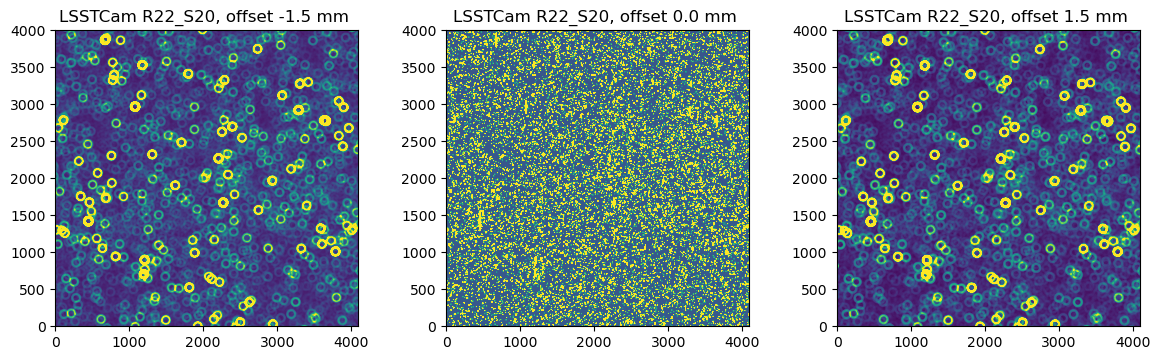

In [59]:
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
fig,ax = plt.subplots(1,3, figsize=(14,5))

zscale = ZScaleInterval()
i=0
for exposure in [exposure_intra, exposure_focus, exposure_extra]:
    d = exposure.image.array
    focusz = exposure.visitInfo.focusZ
    vmin,vmax = zscale.get_limits(d)
    mappable = ax[i].imshow(d, vmin=vmin, vmax=vmax, origin='lower')
    
    ax[i].set_title(f'{exposure.visitInfo.instrumentLabel} {exposure.detector.getName()}, offset {focusz} mm ', )
    i += 1 
#fig.suptitle( f'detector: {exposure.detector.getId()} ({exposure.detector.getName()})')
#plt.colorbar(mappable, ax=ax[1]) 
fig.subplots_adjust(wspace=0.29)

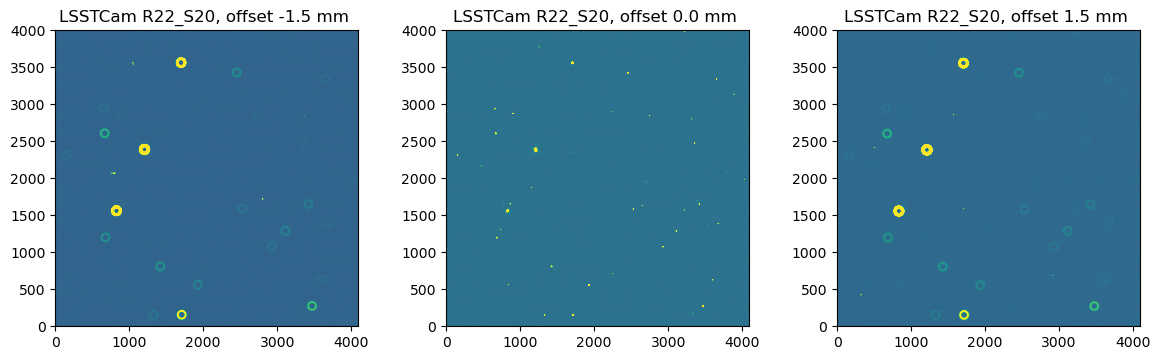

In [49]:
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
fig,ax = plt.subplots(1,3, figsize=(14,5))

zscale = ZScaleInterval()
i=0
for exposure in [exposure_intra, exposure_focus, exposure_extra]:
    d = exposure.image.array
    focusz = exposure.visitInfo.focusZ
    vmin,vmax = zscale.get_limits(d)
    mappable = ax[i].imshow(d, vmin=vmin, vmax=vmax, origin='lower')
    
    ax[i].set_title(f'{exposure.visitInfo.instrumentLabel} {exposure.detector.getName()}, offset {focusz} mm ', )
    i += 1 
#fig.suptitle( f'detector: {exposure.detector.getId()} ({exposure.detector.getName()})')
#plt.colorbar(mappable, ax=ax[1]) 
fig.subplots_adjust(wspace=0.29)

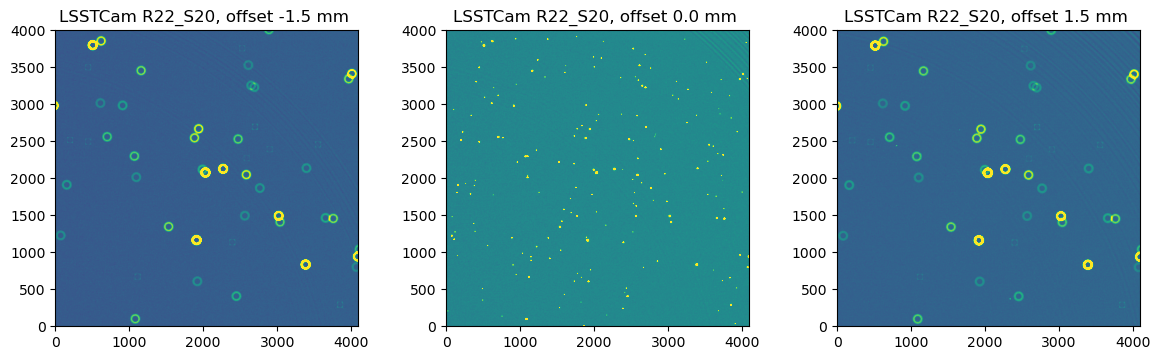

In [12]:
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
fig,ax = plt.subplots(1,3, figsize=(14,5))

zscale = ZScaleInterval()
i=0
for exposure in [exposure_intra, exposure_focus, exposure_extra]:
    d = exposure.image.array
    focusz = exposure.visitInfo.focusZ
    vmin,vmax = zscale.get_limits(d)
    mappable = ax[i].imshow(d, vmin=vmin, vmax=vmax, origin='lower')
    
    ax[i].set_title(f'{exposure.visitInfo.instrumentLabel} {exposure.detector.getName()}, offset {focusz} mm ', )
    i += 1 
#fig.suptitle( f'detector: {exposure.detector.getId()} ({exposure.detector.getName()})')
#plt.colorbar(mappable, ax=ax[1]) 
fig.subplots_adjust(wspace=0.29)

Given that we have three different vists (two with larger flux limit of 1e9),   we can compare the postISR image with the reference catalog to see where we start loosing sources... 

    739419 : 940   max_flux 1e7 
    739789 : 950   max_flux 1e9
    739388 : 960   max_flux 1e9



Plot just the defocal image: 

-1.5


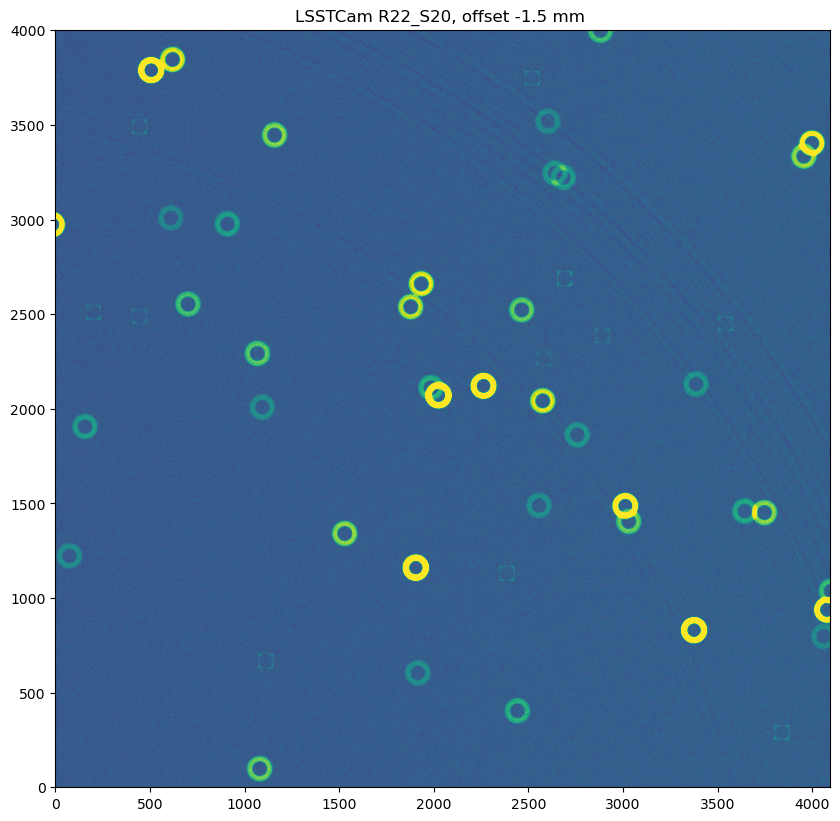

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
exposure = exposure_intra
d = exposure.image.array
focusz = exposure.visitInfo.focusZ
vmin,vmax = zscale.get_limits(d)
mappable = ax.imshow(d, vmin=vmin, vmax=vmax, origin='lower')
ax.set_title(f'{exposure.visitInfo.instrumentLabel} {exposure.detector.getName()}, offset {focusz} mm ', )
print(focusz)

In [ ]:
import lsst.daf.butler as daf_butler
from lsst.meas.algorithms import ReferenceObjectLoader
import lsst.geom

collection='refcats/gaia_dr2_20200414' 
dstype='gaia_dr2_20200414'

butler = daf_butler.Butler(butlerRootPath,
                           collections=['refcats/gaia_dr2_20200414'])
refs = set(butler.registry.queryDatasets(dstype))

refCats = [daf_butler.DeferredDatasetHandle(butler, _, {})
           for _ in refs]


dataIds = [butler.registry.expandDataId(_.dataId) for _ in refs]
config = ReferenceObjectLoader.ConfigClass()
config.filterMap = {f'{_}': f'phot_{_}_mean' for _ in ('g', 'bp', 'rp')}
ref_obj_loader = ReferenceObjectLoader(dataIds=dataIds,
                                       refCats=refCats,
                                       config=config)

# fieldRA, fieldDec correspond to the pointing of the entire visit,
# but for R22 that works fine since it's the center raft 

# otherwise it would be better to read the centroid file
# and take the mean of the centroid file 
ra = lsst.geom.Angle(mean_ra_deg, lsst.geom.degrees)
dec = lsst.geom.Angle(mean_dec_deg, lsst.geom.degrees)

center = lsst.geom.SpherePoint(ra, dec)
radius = lsst.geom.Angle(500, lsst.geom.arcseconds)
refcat_region = lsst.sphgeom.Circle(center.getVector(), radius)
band = 'bp'
cat = ref_obj_loader.loadRegion(refcat_region, band).refCat
df = cat.asAstropy().to_pandas().sort_values('id')



Would it work if I fed WEP  with all detectors trying to run in FAM  mode ? I need to import the settings from 

lsst/ts/wep/policy/cwfs/instData/lsst   or  /lsstfam  .... 

If I used the import of   `lsst`    it would be  https://github.com/lsst-ts/ts_wep/blob/develop/policy/cwfs/instData/lsst/instParamPipeConfig.yaml  i.e. : 

    
    description: LSST Telescope Parameters
    instrument: lsst.obs.lsst.LsstCam

    tasks:
      cutOutDonutsCwfsTask:
        class: lsst.ts.wep.task.cutOutDonutsCwfsTask.CutOutDonutsCwfsTask
        config:
          # Obscuration (inner_radius / outer_radius of M1M3)
          instObscuration: 0.61
          # Focal length in m
          instFocalLength: 10.312
          # Aperture diameter in m
          instApertureDiameter: 8.36
          # Defocal distance offset in mm
          # Set to 1.5 since this will override focusZ
          instDefocalOffset: 1.5
          # Camera pixel size in m
          instPixelSize: 10.0e-6
      calcZernikesTask:
        class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask
        config:
          # Obscuration (inner_radius / outer_radius of M1M3)
          instObscuration: 0.61
          # Focal length in m
          instFocalLength: 10.312
          # Aperture diameter in m
          instApertureDiameter: 8.36
          # Defocal distance offset in mm
          # Set to 1.5 since this will override focusZ
          instDefocalOffset: 1.5
          # Camera pixel size in m
          instPixelSize: 10.0e-6

            
    
    
and for `lsstfam`  https://github.com/lsst-ts/ts_wep/blob/develop/policy/cwfs/instData/lsstfam/instParamPipeConfig.yaml  it would be : 
    
    
    
    description: LSST Telescope Parameters
    instrument: lsst.obs.lsst.LsstCam

    tasks:
      cutOutDonutsScienceSensorTask:
        class: lsst.ts.wep.task.cutOutDonutsScienceSensorTask.CutOutDonutsScienceSensorTask
        config:
          # Obscuration (inner_radius / outer_radius of M1M3)
          instObscuration: 0.61
          # Focal length in m
          instFocalLength: 10.312
          # Aperture diameter in m
          instApertureDiameter: 8.36
          # Defocal distance offset in mm
          instDefocalOffset: 1.5
          # Camera pixel size in m
          instPixelSize: 10.0e-6
      calcZernikesTask:
        class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask
        config:
          # Obscuration (inner_radius / outer_radius of M1M3)
          instObscuration: 0.61
          # Focal length in m
          instFocalLength: 10.312
          # Aperture diameter in m
          instApertureDiameter: 8.36
          # Defocal distance offset in mm
          instDefocalOffset: 1.5
          # Camera pixel size in m
          instPixelSize: 10.0e-6

## Run WEP on all lsstCam detectors

In [2]:
from lsst.ts.wep.utils import getConfigDir as getWepConfigDir

#in below I set max mag to 17,
#min mag to 13,  b/c there aren't any donuts brighter than 13 that are simulated,
#yet the refcat thinks they are there ...
#at least with 1e7 max_flux . 

def writeWepConfigurationWepOnly(instName, pipelineYamlPath):
        """Write wavefront estimation pipeline task configuration.

        Parameters
        ----------
        instName : str
            Name of the instrument this configuration is intended for.
        pipelineYamlPath : str
            Path where the pipeline task configuration yaml file
            should be saved.
        filterTypeName : str
            Filter type name: ref (or ''), u, g, r, i, z, or y.
        """

        butlerInstName = "Cam"

        with open(pipelineYamlPath, "w") as fp:
            fp.write(
                f"""# This yaml file is used to define the tasks and configuration of
# a Gen 3 pipeline used for testing
description: basic processing pipeline with imsim
# Here we specify the corresponding instrument for the data we
# will be using.
instrument: lsst.obs.lsst.Lsst{butlerInstName}
# Use imported instrument configuration
#imports:
#  - location: {getWepConfigDir()}/cwfs/instData/{instName}/instParamPipeConfig.yaml
# Then we can specify each task in our pipeline by a name
# and then specify the class name corresponding to that task
tasks:
  generateDonutCatalogWcsTask:
    class: lsst.ts.wep.task.generateDonutCatalogWcsTask.GenerateDonutCatalogWcsTask
    config:
    # this config points to the GAIA DR2 refcat
      connections.refCatalogs: gaia_dr2_20200414
      anyFilterMapsToThis: phot_g_mean
      donutSelector.useCustomMagLimit: True
      donutSelector.magMax: 17.0
      donutSelector.magMin: 13.0
      donutSelector.unblendedSeparation: 160
  cutOutDonutsScienceSensorTask:
    class: lsst.ts.wep.task.cutOutDonutsScienceSensorTask.CutOutDonutsScienceSensorTask
    config:
      # Obscuration (inner_radius / outer_radius of M1M3)
      instObscuration: 0.61
      # Focal length in m
      instFocalLength: 10.312
      # Aperture diameter in m
      instApertureDiameter: 8.36
      # Defocal distance offset in mm
      instDefocalOffset: 1.5
      # Camera pixel size in m
      instPixelSize: 10.0e-6
  calcZernikesTask:
    class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask
    config:
      # Obscuration (inner_radius / outer_radius of M1M3)
      instObscuration: 0.61
      # Focal length in m
      instFocalLength: 10.312
      # Aperture diameter in m
      instApertureDiameter: 8.36
      # Defocal distance offset in mm
      instDefocalOffset: 1.5
      # Camera pixel size in m
      instPixelSize: 10.0e-6
    """)
    


In [83]:
from lsst.ts.wep.utils import getConfigDir as getWepConfigDir
def writeWepConfigurationWepDirect(instName, pipelineYamlPath):
        """Write wavefront estimation pipeline task configuration.

        Parameters
        ----------
        instName : str
            Name of the instrument this configuration is intended for.
        pipelineYamlPath : str
            Path where the pipeline task configuration yaml file
            should be saved.
        filterTypeName : str
            Filter type name: ref (or ''), u, g, r, i, z, or y.
        """

        butlerInstName = "Cam"

        with open(pipelineYamlPath, "w") as fp:
            fp.write(
                f"""# This yaml file is used to define the tasks and configuration of
# a Gen 3 pipeline used for testing
description: basic processing pipeline with imsim
# Here we specify the corresponding instrument for the data we
# will be using.
instrument: lsst.obs.lsst.Lsst{butlerInstName}
# Use imported instrument configuration
imports:
  - location: {getWepConfigDir()}/cwfs/instData/{instName}/instParamPipeConfig.yaml
# Then we can specify each task in our pipeline by a name
# and then specify the class name corresponding to that task
tasks:
  generateDonutDirectDetectTask:
    class: lsst.ts.wep.task.generateDonutDirectDetectTask.GenerateDonutDirectDetectTask
    config:
      instObscuration: 0.61
      instFocalLength: 10.312
      instApertureDiameter: 8.36
      instDefocalOffset: 1.5
      instPixelSize: 10.0e-6
    """)

First create submission script for FAM to use seqNums  940,942:  
     

In [36]:
    
instName = 'lsstfam'
pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineWEP_direct_lsstfam.yaml")
writeWepConfigurationWepDirect(instName, pipelineYamlPath)   
print('Saved ', pipelineYamlPath)


NameError: name 'writeWepConfigurationWepDirect' is not defined

In [37]:
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
instName = 'lsstfam'
pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineWEP_lsstfam.yaml")
writeWepConfigurationWepOnly(instName, pipelineYamlPath)   
print('Saved ', pipelineYamlPath)


Saved  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml


In [40]:
butler = dafButler.Butler(butlerRootPath)
registry = butler.registry
datasetRefs = registry.queryDatasets('postISRCCD',collections=['run1'],
                                     where=f"instrument='LSSTCam' and exposure.seq_num in (940,942)\
                                     and detector in (160,161)").expanded()


In [43]:
for ref in datasetRefs:
    print(ref.dataId.detector)

detector:
  instrument: 'LSSTCam'
  id: 160
  full_name: 'R34_S21'
  name_in_raft: 'S21'
  raft: 'R34'
  purpose: 'SCIENCE'
detector:
  instrument: 'LSSTCam'
  id: 160
  full_name: 'R34_S21'
  name_in_raft: 'S21'
  raft: 'R34'
  purpose: 'SCIENCE'
detector:
  instrument: 'LSSTCam'
  id: 161
  full_name: 'R34_S22'
  name_in_raft: 'S22'
  raft: 'R34'
  purpose: 'SCIENCE'
detector:
  instrument: 'LSSTCam'
  id: 161
  full_name: 'R34_S22'
  name_in_raft: 'S22'
  raft: 'R34'
  purpose: 'SCIENCE'


Note: the submission that asks for 100 cpus-per-task hits  the SQLs parallelization limit...
    
I didn't know that it was the case that they need to use bps b/c of that  - https://pipelines.lsst.io/modules/lsst.ctrl.bps/quickstart.html  

https://lsstc.slack.com/archives/C01FBUGM2CV/p1644328433727309?thread_ts=1644324144.004309&cid=C01FBUGM2CV

"Also when we do batch jobs we set up what we call an execution butler which is a small local sqlite db that is effectively read only.  This means that batch jobs never talk to the main registry, we then have a merge job that runs at the end to sync up. Even with Postgres you can't have thousands of jobs running in parallel that all keep hitting registry."


    Also problems when running `define-visits` with `-j` more than 1 ... (And below I selected more like 100... ) 

## Create pipetask call to run WEP 

In [6]:
#from lsst.ts.wep.utils import  runProgram

butlerInstName = 'Cam'

numPro=10
instName = 'lsst'
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
#pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineWEP.yaml")

inputRun = 'run_739388'
#inputRun = 'run1' #$ with ISR 
#outputRun = 'runFAM_det160-161_2023_47_ext_1'
outputRun = 'runFAM_960_962_det93-94_2023_47_ext_lim_11-15'
pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineWEP_lsstfam.yaml")

cmd = f"pipetask run -b {butlerRootPath} "+\
            f"-i refcats/gaia_dr2_20200414,{inputRun},LSST{butlerInstName}/calib/unbounded "+\
            f"--instrument lsst.obs.lsst.Lsst{butlerInstName} "+\
            f"--register-dataset-types --output-run {outputRun}  -p {pipelineYamlPath} -d "+\
        f'"exposure.seq_num in (960,962) and detector in (93,94) " -j {numPro}'
        #  f'"exposure.seq_num in (940,942) and detector in (160,161) " -j {numPro}'
print(cmd)
#runProgram(cmd)

pipetask run -b /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded --instrument lsst.obs.lsst.LsstCam --register-dataset-types --output-run runFAM_960_962_det93-94_2023_47_ext_lim_11-15  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector in (93,94) " -j 10


## Submit pipetask for WEP with htcondor 

Try submtting all detectors via `htcondor` ... 

I created `~/.lsst/condor-info.py` 


putting there 

    config.platform["s3df"].user.name="scichris"
    config.platform["s3df"].user.home="/sdf/home/s/scichris"


Then I run `allocateNodes.py` : 


    allocateNodes.py -v -n 10 -c 64 -m 60:00:00 -q roma,milano -g 1800 s3df --account rubin:commissioning

which gives  

    Creating file from template using /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2023_47/conda/envs/lsst-scipipe-7.0.1-exact-ext/share/eups/Linux64/ctrl_platform_s3df/g85fd9198bc+fa548786e5/etc/templates/generic.slurm.template
    Wrote new Slurm submit file to /sdf/scratch/users/s/scichris/condor_scratch/scichris_2024_0109_153831/configs/alloc_scichris_2024_0109_153831.slurm
    Creating file from template using /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2023_47/conda/envs/lsst-scipipe-7.0.1-exact-ext/share/eups/Linux64/ctrl_platform_s3df/g85fd9198bc+fa548786e5/etc/templates/glidein_condor_config.template
    Wrote new condor configuration file to /sdf/scratch/users/s/scichris/condor_scratch/scichris_2024_0109_153831/configs/condor_scichris_2024_0109_153831.config
    Creating file from template using /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2023_47/conda/envs/lsst-scipipe-7.0.1-exact-ext/share/eups/Linux64/ctrl_platform_s3df/g85fd9198bc+fa548786e5/etc/templates/allocation.sh.template
    Wrote new Slurm job allocation bash script to /sdf/scratch/users/s/scichris/condor_scratch/scichris_2024_0109_153831/configs/allocation_scichris_2024_0109_153831.sh
    Targeting 10 glidein(s) for the computing pool/set.
    The working local scratch directory localScratchDir is /sdf/scratch/users/s/scichris/condor_scratch 
    The generated Slurm submit file is /sdf/scratch/users/s/scichris/condor_scratch/scichris_2024_0109_153831/configs/alloc_scichris_2024_0109_153831.slurm 
    The unix user name is scichris 
    The Slurm job name for the glidein jobs is glide_scichris 
    The user home directory is /sdf/home/s/scichris 
    Detected this number of preexisting glidein jobs: 0
     
    The number of glidein jobs to submit now is 10
    Submitting glidein 0 
    Submitted batch job 37738940
    Submitting glidein 1 
    Submitted batch job 37738941
    Submitting glidein 2 
    Submitted batch job 37738942
    Submitting glidein 3 
    Submitted batch job 37738943
    Submitting glidein 4 
    Submitted batch job 37738944
    Submitting glidein 5 
    Submitted batch job 37738945
    Submitting glidein 6 
    Submitted batch job 37738946
    Submitting glidein 7 
    Submitted batch job 37738947
    Submitting glidein 8 
    Submitted batch job 37738948
    Submitting glidein 9 
    Submitted batch job 37738949

And I created `/sdf/group/rubin/shared/scichris/DM-41957_lsstCam_sweep/site_bps.yaml` with 


        site:
          s3df:
            profile:
              condor:
                +Walltime: 7200

So now I can submit a test job with 

    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded --instrument lsst.obs.lsst.LsstCam --register-dataset-types --output-run runFAM_960_962_det93-94_2023_47_ext_lim_11-15_bps  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector in (93,94) " -j 10


    pipetask run -b  {path_to_butler} -i {input_collections} --instrument lsst.obs.lsst.LsstCam --register-dataset-types --output-run {run_name}  -p {path_to_yaml} -d {data_query} -j 10


    bps submit  site_bps.yaml  -b  {path_to_butler} -i {input_collections} -o {run_name}  -p {path_to_yaml} -d {data_query} --extra-init-options "--instrument lsst.obs.lsst.LsstCam --register-dataset-types"

Note - `bps submit -h` gives 


  
    Submission options:
      -b, --butler-config TEXT        Location of the gen3 butler/registry config
                                      file.
      -i, --input COLLECTION ...      Comma-separated names of the input
                                      collection(s).
      -o, --output COLL               Name of the output CHAINED collection. This
                                      may either be an existing CHAINED collection
                                      to use as both input and output
                                      (incompatible with --input), or a new
                                      CHAINED collection created to include all
                                      inputs (requires --input). In both cases,
                                      the collection's children will start with an
                                      output RUN collection that directly holds
                                      all new datasets (see --output-run).
      --output-run COLL               Name of the new output RUN collection. If
                                      not provided then --output must be provided
                                      and a new RUN collection will be created by
                                      appending a timestamp to the value passed
                                      with --output. If this collection already
                                      exists then --extend-run must be passed.
      -d, --data-query QUERY          User data selection expression.
      -p, --pipeline FILE             Location of a pipeline definition file in
                                      YAML format.
      -g, --qgraph TEXT               Location for a serialized quantum graph
                                      definition (pickle file). If this option is
                                      given then all input data options and
                                      pipeline-building options cannot be used.
                                      Can be a URI.
      --extra-qgraph-options TEXT     String to pass through to QuantumGraph
                                      builder.
      --extra-update-qgraph-options TEXT
                                      String to pass through to QuantumGraph
                                      updater.
      --extra-init-options TEXT       String to pass through to pipetaskInit
                                      execution.
      --extra-run-quantum-options TEXT
                                      String to pass through to Quantum execution.
      -h, --help                      Show this message and exit.
      
    


so `--instrument` and ` --register-dataset-types `  would have to be passed as ` --extra-init-options ` (?)  


Try 


    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded  --output-run runFAM_960_962_det93-94_2023_47_ext_lim_11-15_bps2  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector in (93,94) "  --extra-init-options "--instrument lsst.obs.lsst.LsstCam --register-dataset-types"



Try again, but use `-o` instead of `--output-run` ... 


    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded  -o runFAM_960_962_det93-94_2023_47_ext_lim_11-15_bps3  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector in (93,94) "  --extra-init-options "--instrument lsst.obs.lsst.LsstCam --register-dataset-types" 



Try with more eye-catching name .. 

    allocateNodes.py -v -n 10 -c 32 -m 6:00:00 -q roma,milano -g 900 s3df --account rubin:commissioning


    imsim 
    aos

    
    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded  -o aaa_bps_test  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector in (93,94) "  --extra-init-options "--instrument lsst.obs.lsst.LsstCam --register-dataset-types" 




    

Hmm... `bps report`  shows that they're all still running



     X   STATE   %S     ID    OPERATOR  PROJECT   CAMPAIGN       PAYLOAD                                       RUN                                
    --- ------- --- --------- -------- ---------- -------- ------------------- -------------------------------------------------------------------
      F RUNNING  99  103470.0 elhoward ApPipe-HSC DM-41518 DM-41518/test_again                     u_elhoward_DM-41518_test_again_20231102T235312Z
        RUNNING   0 2649382.0 scichris                                                          runFAM_960_962_det93-94_2023_47_ext_lim_11-15_bps2
        RUNNING   0 2649384.0 scichris                                         runFAM_960_962_det93-94_2023_47_ext_lim_11-15_bps3_20240110T000709Z
        RUNNING   0 2649386.0 scichris                                                                               aaa_bps_test_20240110T002601Z
    

(??)


watch -d "bps report --id 2649386.0"


What if I drop the `--extra-init-options`  given that 

`bps report --id 2649386.0` yields 


                              UNKNOWN MISFIT UNREADY READY PENDING RUNNING DELETED HELD SUCCEEDED FAILED PRUNED EXPECTED
    ----------------------------- ------- ------ ------- ----- ------- ------- ------- ---- --------- ------ ------ --------
    TOTAL                               0      0      11     0       1       0       0    0         0      0      0       12
    ----------------------------- ------- ------ ------- ----- ------- ------- ------- ---- --------- ------ ------ --------
    generateDonutCatalogWcsTask         0      0       4     0       0       0       0    0         0      0      0        4
    cutOutDonutsScienceSensorTask       0      0       2     0       0       0       0    0         0      0      0        2
    calcZernikesTask                    0      0       4     0       0       0       0    0         0      0      0        4
    pipetaskInit                        0      0       0     0       1       0       0    0         0      0      0        1
    finalJob                            0      0       1     0       0       0       0    0         0      0      0        1

(as if the `pipetaskInit` was spinning in circles ... ` 


So trying 

    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded  -o aaa_bps_test2  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector in (93,94) " 


I see  - the additional `--extra-init-options` was not needed... Besides, the `pipetask` yaml specifies the instrument, so perhaps it's not necessary to do an extra step ? 


Try running a **processing of entire FAM** to see:

    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded  -o runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962)"



    bps report --id 9420799.0 



    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/gen3repo -i refcats/gaia_dr2_20200414,run_739388,LSSTCam/calib/unbounded  -o runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps_science  -p /sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/lsstPipelineWEP_lsstfam.yaml -d "exposure.seq_num in (960,962) and detector.purpose = 'SCIENCE' "

    bps report --id 9421787.0  

## Test if the output is there! 


1) Test with just 2 sensors 

In [9]:
import lsst.daf.butler as dafButler
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
butler = dafButler.Butler(butlerRootPath)
registry = butler.registry
registry.queryCollections()

['refcats/gaia_dr2_20200414',
 'LSSTCam/calib',
 'LSSTCam/calib/unbounded',
 'LSSTCam/calib/curated/19700101T000000Z',
 'LSSTCam/raw/all',
 'run1',
 'runFAM_test',
 'runFAM',
 'runFAM1',
 'runFAM_det160-161',
 'runFAM_det160-161_1',
 'runFAM_det160-161_2',
 'runFAM_det160-161_3',
 'runFAM_det160-161_4',
 'runFAM_det160-161_37',
 'runFAM_det160-161_46',
 'runFAM_det160-161_36',
 'runFAM_det160-161_30',
 'runFAM_det160-161_2023_47_ext',
 'runFAM_det160-161_2023_47_ext_1',
 'runFAM_det93-94_2023_47_ext_1',
 'runFAM_det93-94_2023_47_ext_lim_13-17',
 'runFAM_940-942',
 'run_739789',
 'run_739388',
 'runFAM_960_962_det93-94_2023_47_ext_lim_11-15',
 'aaa_bps_test2/20240110T004504Z',
 'refcats',
 'aaa_bps_test2']

In [11]:
collection = 'aaa_bps_test2'
datasetRefs = registry.queryDatasets("zernikeEstimateRaw",collections=[collection],
              where=f"instrument='LSSTCam'").expanded()

for ref in datasetRefs:
    print(ref)

zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 93, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=aaa_bps_test2/20240110T004504Z id=2752e79e-7201-4a3d-8c14-2006246d37b7)
zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 94, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=aaa_bps_test2/20240110T004504Z id=bf1e4ebd-e122-4a98-9529-34ab8dece977)


2) Test with all sensors... 

In [1]:
import lsst.daf.butler as dafButler
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')
butler = dafButler.Butler(butlerRootPath)
registry = butler.registry
registry.queryCollections()

['refcats/gaia_dr2_20200414',
 'LSSTCam/calib',
 'LSSTCam/calib/unbounded',
 'LSSTCam/calib/curated/19700101T000000Z',
 'LSSTCam/raw/all',
 'run1',
 'runFAM_test',
 'runFAM',
 'runFAM1',
 'runFAM_det160-161',
 'runFAM_det160-161_1',
 'runFAM_det160-161_2',
 'runFAM_det160-161_3',
 'runFAM_det160-161_4',
 'runFAM_det160-161_37',
 'runFAM_det160-161_46',
 'runFAM_det160-161_36',
 'runFAM_det160-161_30',
 'runFAM_det160-161_2023_47_ext',
 'runFAM_det160-161_2023_47_ext_1',
 'runFAM_det93-94_2023_47_ext_1',
 'runFAM_det93-94_2023_47_ext_lim_13-17',
 'runFAM_940-942',
 'run_739789',
 'run_739388',
 'runFAM_960_962_det93-94_2023_47_ext_lim_11-15',
 'aaa_bps_test2/20240110T004504Z',
 'runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps/20240110T060752Z',
 'refcats',
 'aaa_bps_test2',
 'runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps']

In [4]:
#collection = 'aaa_bps_test2'
collection = 'runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps'
datasetRefs = registry.queryDatasets("zernikeEstimateRaw",collections=[collection],
              where=f"instrument='LSSTCam'").expanded()

refs = []
for ref in datasetRefs:
    print(ref)
    refs.append(ref)

zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 0, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps/20240110T060752Z id=dd4a1b51-7f95-4329-ae84-fad1d0a713e9)
zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 1, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps/20240110T060752Z id=5d7a5fbf-94df-472f-bb6a-0b482ae1ffa3)
zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 2, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps/20240110T060752Z id=8cfae2ed-1a17-45ed-b80a-64c47c1d4df3)
zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 3, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=runFAM_960_962_all_det_2023_47_ext_lim_11-15_bps/20240110T060752Z id=8b3d258d-a6c9-4276-8571-c47e4a3257ba)
zernikeEstimateRaw@{instrument: 

In [21]:
refs[34].dataId.detector.purpose

'SCIENCE'

ok, so all FAM sensors are there! Have a look at donut postage stamps:

In [14]:
ref.dataId.detector

detector.RecordClass(instrument='LSSTCam', id=204, full_name='R44_SW1', name_in_raft='SW1', raft='R44', purpose='WAVEFRONT')

In [22]:
# construct a dataId for zernikes and donut catalog:
# switch exposure to visit
data_id = refs[34].dataId

# the raw Zernikes are all stored for the extra-focal visit ,,., 
zernikes_raw = butler.get(
    "zernikeEstimateRaw", dataId=data_id, collections=[collection]
)

donut_stamps = butler.get(
    "donutStampsExtra", dataId=data_id, collections=[collection]
)
donut_catalog = butler.get(
    "donutCatalog",  dataId=data_id, collections=[collection]
    )


In [23]:
len(donut_stamps)

13

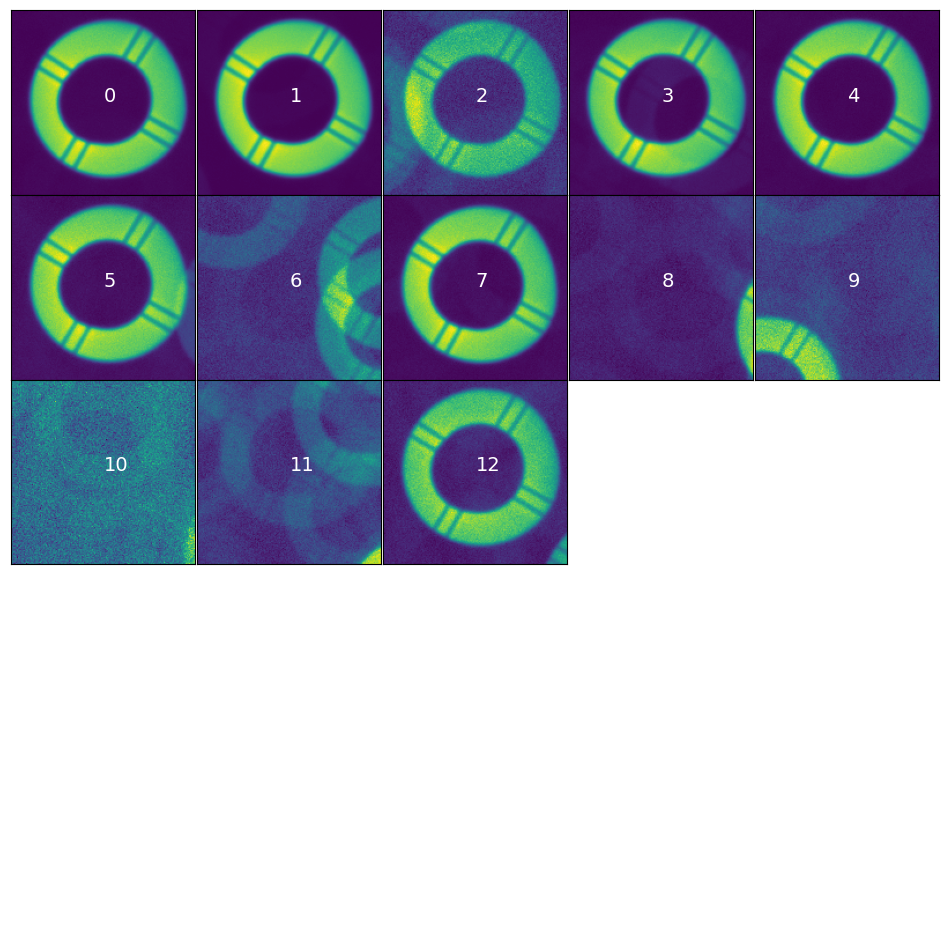

In [24]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

nrows, ncols = 5,5
fig,axs = plt.subplots(nrows,ncols, figsize=(12,12))
ax = np.ravel(axs)
Ndonuts = len(donut_stamps)

for i in range(Ndonuts):
    stamp = donut_stamps[i]
    ax[i].imshow(stamp.stamp_im.image.array, origin='lower')
    ax[i].text(80,80,i, fontsize=14,color='white')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
for i in range(Ndonuts, nrows*ncols): 
    ax[i].axis('off')
    #ax[i].set_xticks([])
    #ax[i].set_yticks([])
fig.subplots_adjust(hspace=0, wspace=0)

## Submit pipetask for WEP with slurm 

Create a slurm submission script for FAM , using that ISR as an input: 

In [86]:
import os 
nodes=1#3
thrs= 100 # for some jobs 5 hrs this is insufficient
partition='milano'
mem = 300

def write_to_file(out_file, content):
    with open(out_file, "w") as output:
        for line in content:
            output.write(line)
# Note that in the output directory we need to make the `atm_psf_files` 
# directory (it doesn't get made automatically, as eg `output_all_R22` with the amp files does):
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'

slurm_file = os.path.join(path_cwd, f'runSlurm_lsstCam-940_942_FAM_two_dets.sl')

path_to_slurm_log = os.path.join(path_cwd, f'slurm_out_940_942_FAM_det160-161_2.out')
content = ['#!/bin/bash -l \n',
          f'#SBATCH --partition {partition} \n',
          '#SBATCH --account rubin:developers \n',
          f'#SBATCH --nodes {nodes} \n',
          f'#SBATCH --mem={mem}G \n',
          f'#SBATCH --cpus-per-task=100\n',
          f'#SBATCH -t {thrs}:00:00 \n', 
          f'#SBATCH --job-name wepFAM \n'
          f'#SBATCH --output={path_to_slurm_log} \n',
            'echo "starting at `date` on `hostname`" \n',
            "pwd \n",
             cmd,
            '\n echo "ended at `date` on `hostname`" \n',
          ]
write_to_file(slurm_file, content)
print(slurm_file)





/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-940_942_FAM_two_dets.sl
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-940_942_FAM_two_dets.sl
/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/runSlurm_lsstCam-940_942_FAM_two_dets.sl


## Inspect the results of running WEP 

Check out the results of the two detectors: 
    
    

In [9]:
import lsst.daf.butler as dafButler
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41957_lsstCam_sweep/'
butlerRootPath = os.path.join(path_cwd, 'gen3repo')

butler = dafButler.Butler(butlerRootPath)
registry = butler.registry
collection = 'runFAM_960_962_det93-94_2023_47_ext_lim_11-15'
#collection = 'runFAM_det93-94_2023_47_ext_lim_13-17' 
#collection = 'runFAM_det93-94_2023_47_ext_1'
#collection = 'runFAM_det160-161_2023_47_ext_1'
#collection = 'runFAM_det160-161_1' # with different mag limits ... 7 to 15 

datasetRefs = registry.queryDatasets("zernikeEstimateRaw",collections=[collection],
              where=f"instrument='LSSTCam'").expanded()

for ref in datasetRefs:
    print(ref)

zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 93, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=runFAM_960_962_det93-94_2023_47_ext_lim_11-15 id=f3ec8ee5-d495-4553-a557-dae49eebcf60)
zernikeEstimateRaw@{instrument: 'LSSTCam', detector: 94, visit: 5028081800962, band: 'z', physical_filter: 'z_20'} [sc=NumpyArray] (run=runFAM_960_962_det93-94_2023_47_ext_lim_11-15 id=0d92b82c-56b9-4356-8532-710d63c8ff2a)


In [10]:
detector = 93
instrument = 'LSSTCam'
exposure_number = 5028081800962

# construct a dataId for zernikes and donut catalog:
# switch exposure to visit
data_id = {"detector": detector, 
           "instrument": instrument, 
           "visit": exposure_number
          }
# the raw Zernikes are all stored for the extra-focal visit ,,., 
zernikes_raw = butler.get(
    "zernikeEstimateRaw", dataId=data_id, collections=[collection]
)

donut_stamps = butler.get(
    "donutStampsExtra", dataId=data_id, collections=[collection]
)
donut_catalog = butler.get(
    "donutCatalog",  dataId=data_id, collections=[collection]
    )


In [11]:
len(zernikes_raw)

20

In [12]:
len(donut_stamps)

20

Why would there be so many donuts?  Check individual stamps... 

In [13]:
import matplotlib.pyplot as plt
import numpy as np 


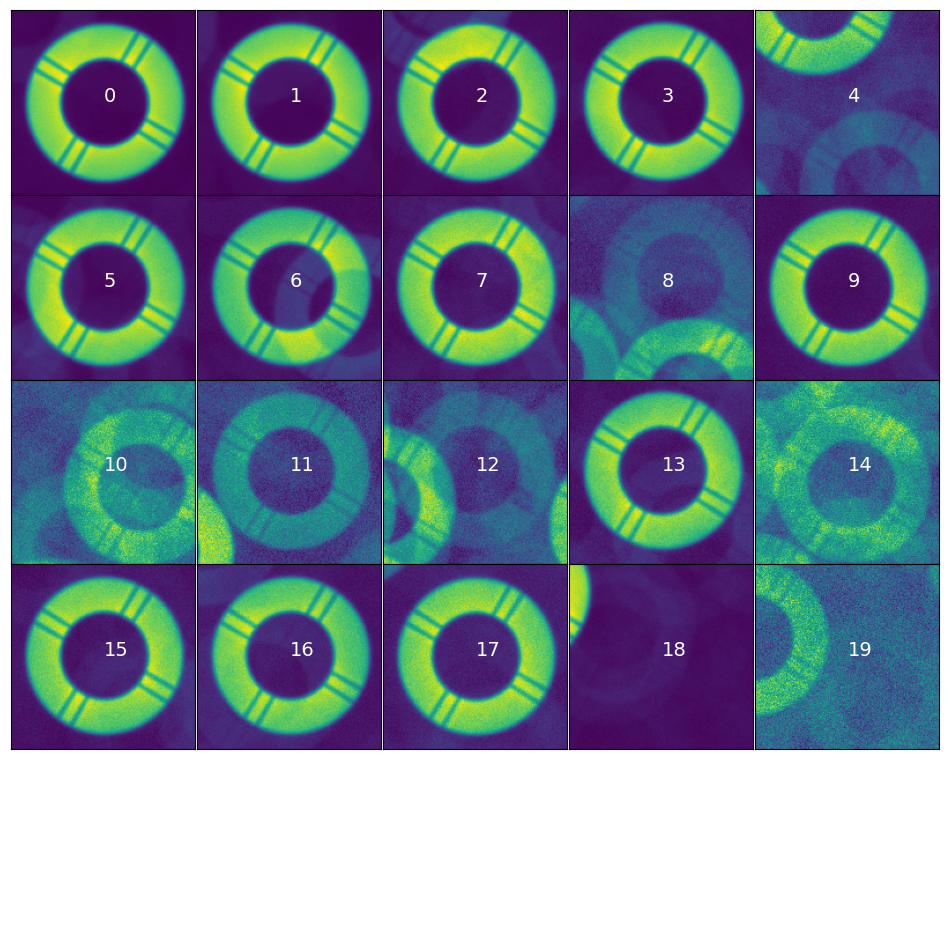

In [20]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

nrows, ncols = 5,5
fig,axs = plt.subplots(nrows,ncols, figsize=(12,12))
ax = np.ravel(axs)
Ndonuts = len(donut_stamps)

for i in range(Ndonuts):
    stamp = donut_stamps[i]
    ax[i].imshow(stamp.stamp_im.image.array, origin='lower')
    ax[i].text(80,80,i, fontsize=14,color='white')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
for i in range(Ndonuts, nrows*ncols): 
    ax[i].axis('off')
    #ax[i].set_xticks([])
    #ax[i].set_yticks([])
fig.subplots_adjust(hspace=0, wspace=0)

In [15]:
donut_catalog

coord_ra  coord_dec   centroid_x   centroid_y   source_flux  \
0   4.807335  -0.098934  2799.599979  2967.369304  4.995477e+07   
1   4.806922  -0.100051  1572.268194  2980.704541  3.506737e+07   
2   4.805696  -0.099572  1586.581350  1628.244795  3.081729e+07   
3   4.805755  -0.099808  1381.188701  1772.106027  2.740601e+07   
4   4.806204  -0.101076   322.235425  2667.658201  2.189553e+07   
5   4.806267  -0.100034  1350.026467  2345.476505  2.032895e+07   
6   4.805034  -0.098667  2218.007703   661.777289  1.911715e+07   
7   4.807480  -0.099234  2563.182564  3215.650510  1.874734e+07   
8   4.807041  -0.098052  3543.225975  2361.521428  1.570317e+07   
9   4.804925  -0.099895   994.594186  1007.430138  1.451760e+07   
10  4.805873  -0.100928   344.569663  2295.053292  1.440533e+07   
11  4.806443  -0.098565  2829.828580  1976.441160  1.287337e+07   
12  4.807593  -0.099646  2207.321288  3475.807130  1.021282e+07   
13  4.804997  -0.100172   753.675143  1177.889412  9.441525e+06   
14  4.805416  -0.100686   410.752368  1769.117122  8.442951e+06   
15  4.807384  -0.097841  3871.280383  2613.765766  7.700651e+06   
16  4.806048  -0.100804   527.242751  2418.016628  7.673746e+06   
17  4.806500  -0.098262  3142.961407  1919.172816  6.505494e+06   
18  4.805698  -0.099409  1744.498588  1570.530332  4.558126e+06   
19  4.805836  -0.099221  1975.702038  1633.964965  4.324678e+06   

   blend_centroid_x blend_centroid_y  
0                []               []  
1                []               []  
2                []               []  
3                []               []  
4                []               []  
5                []               []  
6                []               []  
7                []               []  
8                []               []  
9                []               []  
10               []               []  
11               []               []  
12               []               []  
13               []               []  
14               []               []  
15               []               []  
16               []               []  
17               []               []  
18               []               []  
19               []               []

show the postISR exposure and the donut catalog ... What's going on ? 


In [45]:
runName = 'run1'
day_obs = 280818
butlerInstName = 'Cam'
detector = 93
exposure_intra = butler.get('postISRCCD', 
                              dataId={'instrument':f'LSST{butlerInstName}', 
                                      'detector':detector, 
                                      'exposure':int(f'50{day_obs}00942')}, 
                              collections=[runName]
                            )

(0.0, 4000.0)

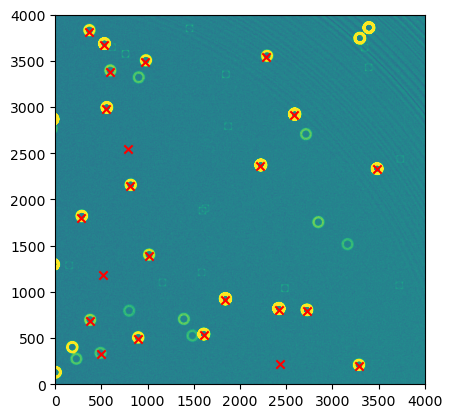

In [46]:
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
d = exposure_intra.image.array
vmin,vmax = zscale.get_limits(d)
fig,ax = plt.subplots(1,1)
ax.imshow(d , vmin=vmin, vmax=vmax, origin='lower')
ax.scatter(donut_catalog['centroid_x'].values, donut_catalog['centroid_y'].values, 
           c='r', marker='x', )#facecolor='')
#mags = df['phot_g_mean_mag'].values.value 
#mask = (mags<14)
#ax.scatter(x[mask],y[mask],s=50, facecolors='none', edgecolors='orange')
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)

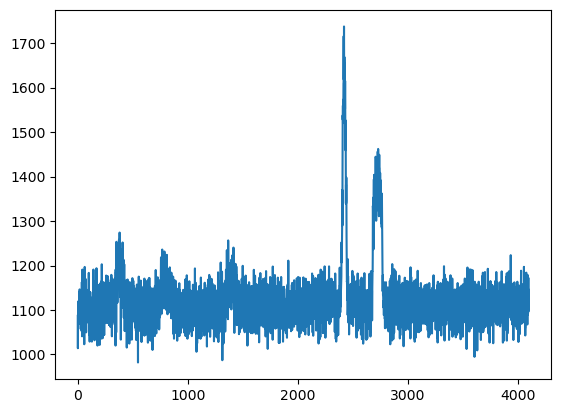

In [51]:
plt.plot(d[750,:])

check how these align with the reference catalog sources...

In [ ]:
mean_ra_rad = np.mean(donut_catalog.coord_ra.values)
mean_dec_rad = np.mean(donut_catalog.coord_dec.values)

mean_ra_deg = np.rad2deg(mean_ra_rad)
mean_dec_deg = np.rad2deg(mean_dec_rad)

In [21]:
import lsst.daf.butler as daf_butler
from lsst.meas.algorithms import ReferenceObjectLoader
import lsst.geom


collection='refcats/gaia_dr2_20200414' 
dstype='gaia_dr2_20200414'

butler = daf_butler.Butler(butlerRootPath,
                           collections=[collection])
refs = set(butler.registry.queryDatasets(dstype))

refCats = [daf_butler.DeferredDatasetHandle(butler, _, {})
           for _ in refs]


dataIds = [butler.registry.expandDataId(_.dataId) for _ in refs]
config = ReferenceObjectLoader.ConfigClass()
config.filterMap = {f'{_}': f'phot_{_}_mean' for _ in ('g', 'bp', 'rp')}
ref_obj_loader = ReferenceObjectLoader(dataIds=dataIds,
                                       refCats=refCats,
                                       config=config)

# fieldRA, fieldDec correspond to the pointing of the entire visit,
# but for R22 that works fine since it's the center raft 

# otherwise it would be better to read the centroid file
# and take the mean of the centroid file 
ra = lsst.geom.Angle(mean_ra_deg, lsst.geom.degrees)
dec = lsst.geom.Angle(mean_dec_deg, lsst.geom.degrees)

center = lsst.geom.SpherePoint(ra, dec)
radius = lsst.geom.Angle(1500, lsst.geom.arcseconds)
refcat_region = lsst.sphgeom.Circle(center.getVector(), radius)
band = 'bp'
cat = ref_obj_loader.loadRegion(refcat_region, band).refCat
df = cat.asAstropy().to_pandas().sort_values('id')



INFO:lsst.meas.algorithms.loadReferenceObjects.ReferenceObjectLoader:Loading reference objects from None in region bounded by [218.19937953, 219.05663417], [13.14895396, 13.98229073] RA Dec
INFO:lsst.meas.algorithms.loadReferenceObjects.ReferenceObjectLoader:Loaded 2187 reference objects


In [22]:
import astropy.units as u
wcs = exposure_intra.getWcs()
x,y = wcs.skyToPixelArray(df['coord_ra'], df['coord_dec'])

flux = df['phot_g_mean_flux'].values
mag = (flux*u.nJy).to(u.ABmag)
df['phot_g_mean_mag'] = mag
mags = df['phot_g_mean_mag'].values.value 



(0.0, 4000.0)

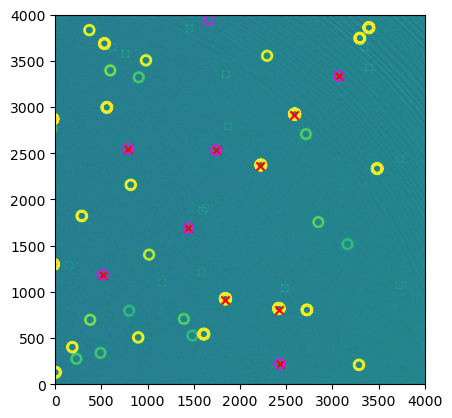

In [27]:
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
d = exposure_intra.image.array
vmin,vmax = zscale.get_limits(d)
fig,ax = plt.subplots(1,1)
mask = (mags<14.)
ax.imshow(d , vmin=vmin, vmax=vmax, origin='lower')
ax.scatter(donut_catalog['centroid_x'].values, donut_catalog['centroid_y'].values, 
           c='r', marker='x', )#facecolor='')

ax.scatter(x[mask],y[mask],s=50, facecolors='none', edgecolors='magenta')
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)

In [ ]:
Wow, so it turns out that we basically do not simulate anything brighter than 14th mag with that setting! 

So instead of 1e7, definitely use 1e10 or 1e11... 

5 magnitudes difference is 100 times flux difference. 

